In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle
from sklearn.preprocessing import StandardScaler

## 1) Importing Data 

In [24]:
sp500=yf.download('^NSEI',start="2018-01-01", end="2022-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [25]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400
2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300
2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900
2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900
2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000


In [26]:
sp500['Returns %']=sp500['Adj Close'].diff() / sp500['Adj Close']

In [27]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2018-01-02,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400,NaN
2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300,0.000096
2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900,0.005864
2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900,0.005119
2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000,0.006095


<AxesSubplot:xlabel='Date'>

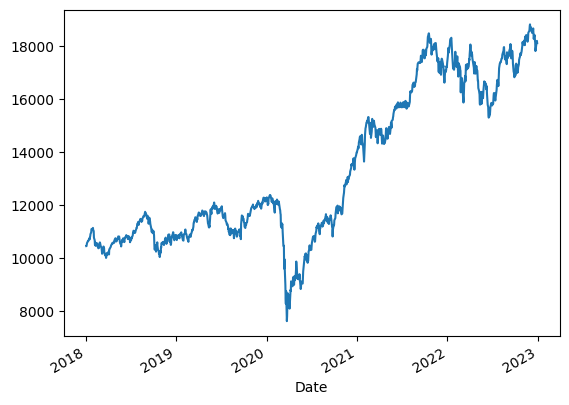

In [28]:
sp500['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

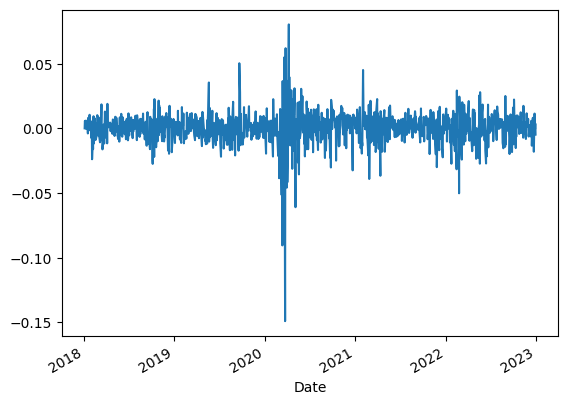

In [29]:
sp500['Returns %'].plot()

In [30]:
# sp500['Adj Close'].ewm(span=100).mean().plot()

In [31]:
# sp500['Adj Close']=sp500['Adj Close'].ewm(span=80).mean()

<AxesSubplot:xlabel='Date'>

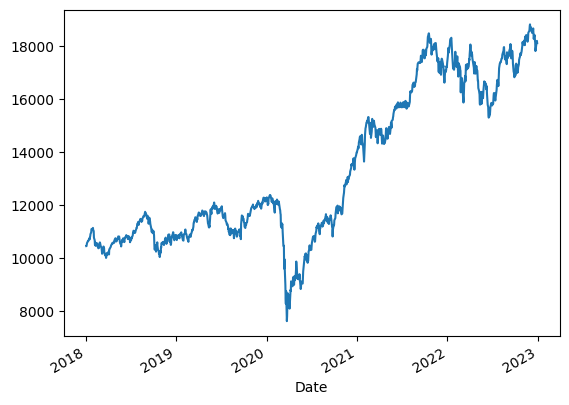

In [32]:
sp500['Adj Close'].plot()

The cyclical component represents phenomena that happen across seasonal periods. Cyclical patterns do not have a fixed period like seasonal patterns do. An example of a cyclical pattern is the cycles of boom and bust that stock markets experience in response to world events. <br>
This data seems to have cyclical component with no consistent cyclicity. So instead of decomposing it into trend, seasonality, noise, we would just keep it as it is.

In [33]:
sp500['Adj Close'].shape

(1232,)

Figure(640x480)


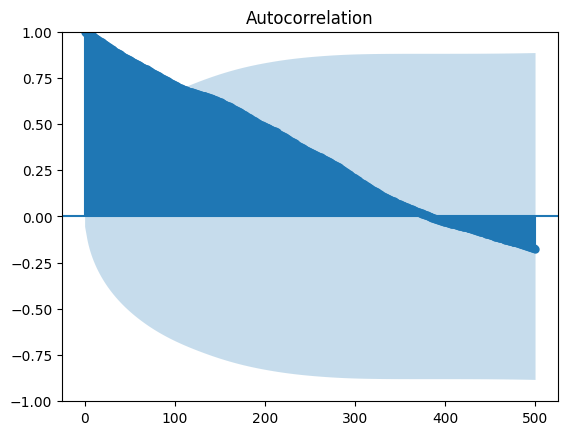

In [34]:
print(plot_acf(sp500['Adj Close'],lags=500))

Also autocorrelation graph shows no seasonal pattern.

## 4) Model

In [35]:
'''with open('nifty_08_12.pkl', 'wb') as f:
    pickle.dump(sar, f) '''

"with open('nifty_08_12.pkl', 'wb') as f:\n    pickle.dump(sar, f) "

In [36]:
'''with open('nifty_08_12.pkl', 'rb') as f:
    sar = pickle.load(f) '''

"with open('nifty_08_12.pkl', 'rb') as f:\n    sar = pickle.load(f) "

In [37]:
sp500_fore=yf.download('^NSEI',start="2023-01-01", end="2023-03-08",interval='1d')
sp500_fore['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2023-01-02    18197.449219
2023-01-03    18232.550781
2023-01-04    18042.949219
2023-01-05    17992.150391
2023-01-06    17859.449219
2023-01-09    18101.199219
2023-01-10    17914.150391
2023-01-11    17895.699219
2023-01-12    17858.199219
2023-01-13    17956.599609
2023-01-16    17894.849609
2023-01-17    18053.300781
2023-01-18    18165.349609
2023-01-19    18107.849609
2023-01-20    18027.650391
2023-01-23    18118.550781
2023-01-24    18118.300781
2023-01-25    17891.949219
2023-01-27    17604.349609
2023-01-30    17648.949219
2023-01-31    17662.150391
2023-02-01    17616.300781
2023-02-02    17610.400391
2023-02-03    17854.050781
2023-02-06    17764.599609
2023-02-07    17721.500000
2023-02-08    17871.699219
2023-02-09    17893.449219
2023-02-10    17856.500000
2023-02-13    17770.900391
2023-02-14    17929.849609
2023-02-15    18015.849609
2023-02-16    18035.849609
2023-02-17    17944.199219
2023-02-20    17844.599609
2023-02-21    17826.699219
2023-02-22    17554.300

In [38]:
sp500_fore['Returns %']=sp500_fore['Adj Close'].diff() / sp500_fore['Adj Close']

In [39]:
# np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)

In [40]:
# np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1).append(sp500_fore['Adj Close'])

In [41]:
# non seasonal
def dynamic_pred(df,df1):
    len_df=len(df)
    pred_df=pd.Series()
    for y,x in df1.items():
        sar = sm.tsa.statespace.SARIMAX(df, 
                                order=(2,0,1), 
                                seasonal_order=(1,0,0,40), 
                                trend='c').fit()
        pred=sar.forecast(steps=1)
        
        x=pd.Series([x],index=[y])
        pred.index=x.index
        pred_df=pred_df.append(pred)
        if len(df)==len_df+len(df1):
            break
        else:
            df=df.append(x)
              
    return pred_df

In [42]:
sp500_for=dynamic_pred(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))

C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred_df=pd.Series()
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return 

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_19280\687720573.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

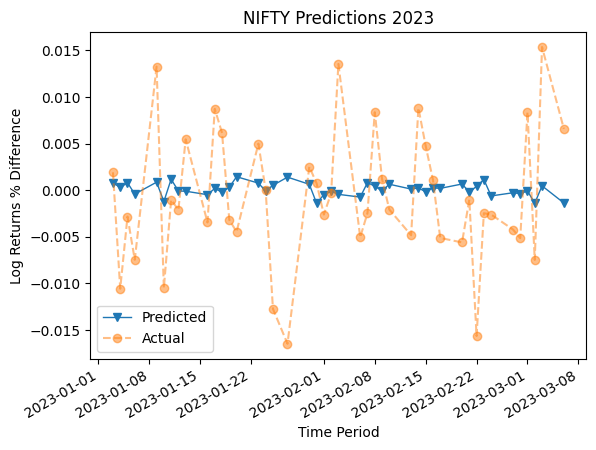

In [47]:
import matplotlib.pyplot as plt
sp500_for.plot(marker='v',linewidth=1)
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).plot(xlabel='Time Period',ylabel='Log Returns % Difference',linestyle='--',marker='o',alpha=0.5,legend='Actual')
plt.legend(['Predicted','Actual'])
plt.title('NIFTY Predictions 2023')
plt.savefig('ppt_pics/NIFTY_predictions_2023.png')

<AxesSubplot:xlabel='Date'>

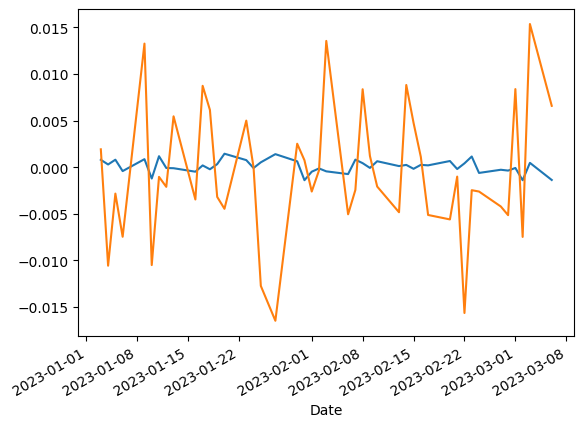

In [48]:
sp500_for.plot()
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).plot()

In [49]:
# np.sign(np.array(sp500_for))==np.sign(np.array(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)))

In [51]:
def accuracy_sarimax(df1,df2):
    x=np.sign(np.array(df1))==np.sign(np.array(df2))
    
    return sum(x) / len(x)

In [52]:
acc_nifty_ns_18_22=accuracy_sarimax(sp500_for,np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))
acc_nifty_ns_18_22

0.5

In [53]:
from sklearn.metrics import r2_score
r2_score(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1), sp500_for)

-0.027130332291277703

In [25]:
%store acc_nifty_ns_18_22

Stored 'acc_nifty_ns_18_22' (float64)
